# Spotify Tracks Clustering and Content-Based Recommendation

In [1]:
import pandas as pd

## Load Data

In [2]:
df = pd.read_csv('./data/data.csv')

In [3]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

## Taking useful columns

In [12]:
columns_to_keep = [
    "danceability", "energy", "key", "loudness", "mode", 
    "speechiness", "acousticness", "instrumentalness", 
    "liveness", "valence", "tempo"
]

filtered_df = df[columns_to_keep]

In [13]:
filtered_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917
1,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489
2,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332
3,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740
4,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949


In [14]:
filtered_df['mode'].unique()

array([0, 1])

In [15]:
filtered_df['key'].unique()

array([ 1,  0,  2,  6, 11,  8,  4,  7,  3, 10,  5,  9])

In [16]:
one_hot_filtered_df = pd.get_dummies(filtered_df, columns=['key', 'mode'], drop_first=True, dtype=int)

In [17]:
one_hot_filtered_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key_1,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1
0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,1,...,0,0,0,0,0,0,0,0,0,0
1,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,1,...,0,0,0,0,0,0,0,0,0,1
2,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,0,...,0,0,0,0,0,0,0,0,0,1
3,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,0,...,0,0,0,0,0,0,0,0,0,1
4,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
one_hot_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      114000 non-null  float64
 1   energy            114000 non-null  float64
 2   loudness          114000 non-null  float64
 3   speechiness       114000 non-null  float64
 4   acousticness      114000 non-null  float64
 5   instrumentalness  114000 non-null  float64
 6   liveness          114000 non-null  float64
 7   valence           114000 non-null  float64
 8   tempo             114000 non-null  float64
 9   key_1             114000 non-null  int64  
 10  key_2             114000 non-null  int64  
 11  key_3             114000 non-null  int64  
 12  key_4             114000 non-null  int64  
 13  key_5             114000 non-null  int64  
 14  key_6             114000 non-null  int64  
 15  key_7             114000 non-null  int64  
 16  key_8             11

## Normalizing the Data

K-Means is distance-based, so features must be on the same scale to avoid bias towards features with larger ranges.

In [21]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Define columns to normalize
audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                 'acousticness', 'instrumentalness', 'liveness',
                 'valence', 'tempo']

# Initialize scaler
scaler = StandardScaler()

# Create copy of original data
df_normalized = one_hot_filtered_df.copy()

# Normalize only audio features
df_normalized[audio_features] = scaler.fit_transform(one_hot_filtered_df[audio_features])

In [23]:
df_normalized.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key_1,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1
0,0.629244,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863,1,...,0,0,0,0,0,0,0,0,0,0
1,-0.845908,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717,1,...,0,0,0,0,0,0,0,0,0,1
2,-0.742186,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.733304,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859,0,...,0,0,0,0,0,0,0,0,0,1
4,0.295030,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
# Saving scaler
import joblib

joblib.dump(scaler, './scalers/scaler.joblib')

['./scalers/scaler.joblib']

## Determine the Optimal Number of Clusters (k)

Using the Elbow Method to decide the optimal number of clusters.

In [25]:
from sklearn.cluster import KMeans

inertia = []

# Spotify has 125 tracks
for k in range(1, 126):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

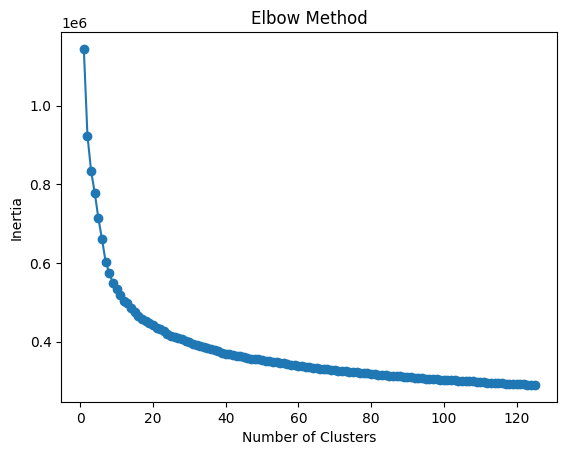

In [27]:
import matplotlib.pyplot as plt

plt.plot(range(1, 126), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Note:- not able to find through elbow method so i will use n = 125 for best possible clusters

## Applying k=125

In [28]:
kmeans = KMeans(n_clusters=125, random_state=42)
clusters = kmeans.fit_predict(df_normalized)

In [29]:
one_hot_filtered_df['cluster'] = clusters

In [30]:
one_hot_filtered_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key_1,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,cluster
0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,1,...,0,0,0,0,0,0,0,0,0,2
1,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,1,...,0,0,0,0,0,0,0,0,1,42
2,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,0,...,0,0,0,0,0,0,0,0,1,35
3,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,0,...,0,0,0,0,0,0,0,0,1,15
4,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,0,...,0,0,0,0,0,0,0,0,1,28


In [31]:
one_hot_filtered_df['cluster'].unique()

array([  2,  42,  35,  15,  28,   9,  96,  57,  83,  21,  84,  53,  11,
         1,  77,  99,  91,  74,  17,  61,  97, 108,  10,  41,  79,  68,
         3,  13,  60,  62,  38,  56, 112, 104,  69,  49, 116,  55, 102,
        98, 120, 121,  27,  40,  32, 124,  87, 115, 105,   8, 100,  37,
        94, 118,  54, 113,  34,   5,  82,  89,  80,  46,  26,  14, 110,
        95,  47,  86,  73,  25,  36,  20, 101,  67, 123, 117, 119, 122,
       107,  52,  16,  51,  12,  45,  63,  81, 114, 109, 106,  29,  39,
        70,  92,  18,  90,   7, 111,  22,  24,  71,  30,  59,  88,  78,
         6,  76,  19,  65,  66,  50,  33,  75,  48,   0, 103,  44,  58,
        23,  43,  72,   4,  93,  31,  85,  64], dtype=int32)

In [32]:
cluster_summary = one_hot_filtered_df.groupby('cluster').mean()
cluster_summary

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key_1,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.322810,0.938551,-5.074483,0.121340,0.013266,0.062049,0.364753,0.192358,109.395069,0.144133,...,0.012755,0.093112,0.054847,0.076531,0.088010,0.047194,0.098214,0.062500,0.067602,0.674745
1,0.517324,0.122861,-19.196261,0.052370,0.879000,0.037959,0.142829,0.291433,108.463416,0.073654,...,0.038244,0.077904,0.103399,0.038244,0.126062,0.048159,0.121813,0.059490,0.049575,0.735127
2,0.816181,0.538876,-8.443812,0.206517,0.213984,0.015050,0.141420,0.623869,93.949561,0.200480,...,0.016807,0.088836,0.048019,0.049220,0.122449,0.051621,0.132053,0.057623,0.057623,0.655462
3,0.474639,0.772506,-5.457876,0.046175,0.064002,0.019632,0.134062,0.251183,137.518097,0.068082,...,0.038067,0.068082,0.081259,0.051977,0.122255,0.119327,0.076135,0.051977,0.067350,1.000000
4,0.268882,0.077900,-25.088155,0.045287,0.941627,0.894415,0.120133,0.132003,77.766799,0.058888,...,0.064340,0.086150,0.093784,0.037077,0.124318,0.049073,0.082879,0.051254,0.038168,0.675027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.748701,0.792950,-5.459349,0.059037,0.133176,0.021187,0.103310,0.824478,113.339561,0.000000,...,0.039339,0.114025,0.089510,0.100342,0.032497,0.064994,0.135690,0.139111,0.179019,0.000000
121,0.525501,0.838085,-5.197909,0.055391,0.080974,0.013790,0.132030,0.702758,94.925695,0.092074,...,0.012010,0.080865,0.080064,0.026421,0.120897,0.124900,0.132106,0.030424,0.070456,1.000000
122,0.242544,0.376076,-15.826320,0.061835,0.144871,0.790671,0.160355,0.089810,102.485930,0.111369,...,0.016241,0.060325,0.104408,0.067285,0.125290,0.058005,0.116009,0.088167,0.046404,0.568445


## Plot clusters

In [41]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns

In [90]:
one_hot_filtered_df.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,cluster
0,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,...,0,0,0,0,0,0,0,0,0,0
1,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,...,0,0,0,0,0,0,0,0,0,0
2,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,...,0,0,0,0,0,0,0,0,0,4
3,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,...,0,0,0,0,0,0,0,0,0,2
4,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,...,0,0,0,0,0,0,0,0,0,2


## Recovering `df` to implement recomender system

In [43]:
original_df = df.copy()
original_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


### Assigning clusters

In [44]:
original_df['cluster'] = clusters

In [45]:
original_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,2
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,42
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,35
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,15
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,25
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,23
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,84
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,91


##### Saving `original_df` with clusters as label

In [52]:
original_df = original_df.drop_duplicates(subset=['track_name'], keep='first').reset_index(drop=True)

In [53]:
original_df.to_csv('./data/clustered_data.csv', index=False)

#### Loading `orginal_df` with clusters as label

In [54]:
original_df = pd.read_csv('./data/clustered_data.csv')

In [55]:
original_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,2
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,42
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,35
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,15
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,28


## Let's create a Content-Based Recommender System

In [68]:
from sklearn.metrics.pairwise import cosine_similarity
import joblib

In [ ]:
# Select relevant features for content-based filtering
audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                 'acousticness', 'instrumentalness', 'liveness',
                 'valence', 'tempo']

scaler = joblib.load('./scalers/scaler.joblib')
original_df[audio_features] = scaler.fit_transform(original_df[audio_features])

In [66]:
original_df[audio_features]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.657203,-0.680156,0.349316,0.441398,-0.879762,-0.556341,0.672232,0.938304,-1.134475
1,-0.776890,-1.820556,-1.622415,-0.117695,1.744612,-0.556327,-0.604540,-0.758228,-1.480116
2,-0.676055,-1.074463,-0.212371,-0.290369,-0.356535,-0.556344,-0.525052,-1.314903,-1.518465
3,-1.639586,-2.231873,-1.863030,-0.452983,1.688699,-0.556131,-0.450532,-1.227804,1.975330
4,0.332292,-0.749739,-0.202408,-0.316354,0.405646,-0.556344,-0.694460,-1.136919,-0.072760
...,...,...,...,...,...,...,...,...,...
73604,-1.275461,-1.801227,-1.327849,-0.463880,1.732841,-0.487244,-0.768980,-0.531014,0.331548
73605,-2.166167,-1.553818,-1.464135,-0.403528,0.908862,2.243880,-0.677569,-1.640955,0.127637
73606,-2.154963,-2.009978,-1.825998,-0.421131,1.950607,2.388719,-0.584668,-1.636790,-1.223239
73607,0.393913,-1.190436,-0.430616,-0.405205,1.576873,-0.556344,-0.689492,1.044337,0.339204


In [73]:
original_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.657203,-0.680156,1,0.349316,0,0.441398,-0.879762,-0.556341,0.672232,0.938304,-1.134475,4,2
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,-0.776890,-1.820556,1,-1.622415,1,-0.117695,1.744612,-0.556327,-0.604540,-0.758228,-1.480116,4,42
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,-0.676055,-1.074463,0,-0.212371,1,-0.290369,-0.356535,-0.556344,-0.525052,-1.314903,-1.518465,4,35
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,-1.639586,-2.231873,0,-1.863030,1,-0.452983,1.688699,-0.556131,-0.450532,-1.227804,1.975330,3,15
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.332292,-0.749739,2,-0.202408,1,-0.316354,0.405646,-0.556344,-0.694460,-1.136919,-0.072760,4,28


In [72]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73609 entries, 0 to 73608
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          73609 non-null  object 
 1   artists           73608 non-null  object 
 2   album_name        73608 non-null  object 
 3   track_name        73608 non-null  object 
 4   popularity        73609 non-null  int64  
 5   duration_ms       73609 non-null  int64  
 6   explicit          73609 non-null  bool   
 7   danceability      73609 non-null  float64
 8   energy            73609 non-null  float64
 9   key               73609 non-null  int64  
 10  loudness          73609 non-null  float64
 11  mode              73609 non-null  int64  
 12  speechiness       73609 non-null  float64
 13  acousticness      73609 non-null  float64
 14  instrumentalness  73609 non-null  float64
 15  liveness          73609 non-null  float64
 16  valence           73609 non-null  float6

In [95]:
# Get recommendations with similarity
def content_based_recommendations(track_id, data, features, top_n=10):
    if track_id not in data["track_id"].values:
        raise ValueError(f"Track ID '{track_id}' not found in the dataset.")
    
    track_features = data[data["track_id"] == track_id][features].values
    similarities = cosine_similarity(track_features, data[features])[0]
    
    temp_data = data.copy()
    temp_data["similarity"] = similarities
    
    recommendations = (
        temp_data[temp_data["track_id"] != track_id]
        .sort_values(by="similarity", ascending=False)
        .head(top_n)
    )
    
    return recommendations[["track_id", "track_name", "artists", "album_name", "similarity"]]

In [96]:
# Get recommendations with clustering
def content_based_recommendations_with_clustering(track_id, data, features, top_n=10):
    if track_id not in data["track_id"].values:
        raise ValueError(f"Track ID '{track_id}' not found in the dataset.")
    
    track_cluster = data[data["track_id"] == track_id]["cluster"].values[0]
    cluster_data = data[data["cluster"] == track_cluster].copy()

    track_features = data[data["track_id"] == track_id][features].values
    similarities = cosine_similarity(track_features, cluster_data[features])[0]
    cluster_data["similarity"] = similarities
    
    recommendations = (
        cluster_data[cluster_data["track_id"] != track_id]
        .sort_values(by="similarity", ascending=False)
        .head(top_n)
    )
    
    return pd.DataFrame(recommendations[["track_id", "track_name", "artists", "album_name", "similarity"]])

In [97]:
# Get liked song without similarity column
def show_liked_song(track_id, df):
    liked_song = df.loc[df['track_id'] == track_id]
    if liked_song.empty:
        print(f"Track ID {track_id} not found")
        return None
    
    return pd.DataFrame(liked_song[["track_id", "track_name", "artists", "album_name"]])


In [98]:
liked_track_id = "6nvbYcbL79UQ5VFKE0aeeq"

print("Liked Song:")
show_liked_song(liked_track_id, original_df)

Liked Song:


,track_id,track_name,artists,album_name
2300,6nvbYcbL79UQ5VFKE0aeeq,In The Name Of Love - Recorded At Spotify Stud...,Kari Jobe,Sad Love Songs 2022


In [99]:
print("\nTop Recommendations:")
features = ['danceability', 'energy', 'loudness', 'speechiness', 
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
recommendations = content_based_recommendations(liked_track_id, original_df, features)
recommendations


Top Recommendations:


,track_id,track_name,artists,album_name,similarity
16485,3YL8jLIarQdM1y2oRClov9,Million Reasons,Lady Gaga,Concierto en la ducha,0.984486
16535,2qG81jL9UIP54uS8gYyP4k,Who (feat. BTS),Lauv;BTS,~how i'm feeling~,0.975151
64688,2jdAk8ATWIL3dwT47XpRfu,Slow Dancing in a Burning Room,John Mayer,Continuum,0.974890
10024,2pKK1A009lhzhRPeTDderF,執迷不悔,Faye Wong,執迷不悔,0.968266
51334,37JImn8x77h4VTX6V8muvE,Eu Quero Ser Feliz Agora,Oswaldo Montenegro,De Passagem,0.965646
28881,3Y6K8eaccclu00qImnY1aJ,Tid tröste,Mando Diao,I solnedgången,0.962493
13037,3Hops68rNGkSb6cu6WIjFp,Out Of Time,Lund,Project Of A Person,0.961386
49177,5LlhtR0dYQcYUTapamXiKU,分裂,Jay Chou,八度空間,0.960943
62249,2eiHQhd191OqQ8WKL7VLuj,A Dónde Vamos a Parar (with Natalia Lafourcade...,Gilberto Santa Rosa;Natalia Lafourcade,Necesito un Bolero [(Edición de Lujo)[En Vivo]],0.960475
32581,3OHI9zHA7GuLmhb1m9fsgo,Acredita,Novo Som,As 10 Mais do Novo Som,0.959489


In [100]:
print("\nTop Recommendations - Clustering:")
features = ['danceability', 'energy', 'loudness', 'speechiness', 
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
recommendations = content_based_recommendations_with_clustering(liked_track_id, original_df, features)
recommendations


Top Recommendations - Clustering:


,track_id,track_name,artists,album_name,similarity
51334,37JImn8x77h4VTX6V8muvE,Eu Quero Ser Feliz Agora,Oswaldo Montenegro,De Passagem,0.965646
13037,3Hops68rNGkSb6cu6WIjFp,Out Of Time,Lund,Project Of A Person,0.961386
32581,3OHI9zHA7GuLmhb1m9fsgo,Acredita,Novo Som,As 10 Mais do Novo Som,0.959489
72292,23BU6vssuoPppnNsBwFgQ3,Kuytu Köşelerde,Şanışer,Umut,0.957154
64918,2septrlQ7pS72np0xVPeHD,Ruk Jao Yahi,Anurag Vashisht,Ruk Jao Yahi,0.956966
28605,5ZaQW8tvH33GVJ0E3sLz2w,Misty Morning,Travis Bretzer,Bitter Suites,0.955898
26101,3Y7fpFZbHLpAvWJJYGehz0,Follow The Sun,Xavier Rudd,Spirit Bird,0.953897
40504,7ztSVy67w9rXpKg5L2zN5l,Dhalti Rahe,Twin Strings,Dhalti Rahe - Single,0.953151
10010,4QwWiSJkCeGx99JDAroYHW,情未了,Christopher Wong;Vivian Chow,黃凱芹給您留念30首,0.952348
66651,19YKaevk2bce4odJkP5L22,Nikes,Frank Ocean,Blonde,0.951379
